In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Extract Data

In [2]:
import tabula
supp_file_path='d0se00687d1.pdf'
data = tabula.read_pdf(supp_file_path, pages = "7-10",multiple_datas = False)
data.columns=['Sr. No.','FG','FG Position', 'Redox Potential']

def mapFG(x):
    if x=='N(CH3)2':
        return '2CH3N'
    else:
        return x
data['FG']=data['FG'].map(mapFG)
data

,Sr. No.,FG,FG Position,Redox Potential
0,Phenazine,-,-,-1.74
1,1,2CH3N,1,-1.85
2,2,2CH3N,2,-1.98
3,3,NH2,1,-1.85
4,4,NH2,2,-1.92
...,...,...,...,...
184,185,NO2,1 2 6 7,-0.35
185,186,NO2,1 4 6 9,-0.52
186,187,NO2,2 3 7 8,-0.52
187,188,NO2,1 2 3 4 6 9,0.16


In [3]:
cords_file_path='SI_coordinates_vs1_20200617.txt'
lines=open(cords_file_path,'r').readlines()

mol_dict_xyz={}
key=None
for line in lines:
    if 'neutral' in line.lower() or 'anion' in line.lower():
        key='_'.join(line.strip().split())
        mol_dict_xyz[key]=[]
    elif line=='\n':
        continue
    else:
        mol_dict_xyz[key].append('\t'.join(line.split()))

for key,value in mol_dict_xyz.items():
    mol_dict_xyz[key]=str(len(value))+'\n'+key+'\n'+'\n'.join(value)

print(f'Total Molecules Found = {len(mol_dict_xyz)}')
print('Key = '+next(iter(mol_dict_xyz.keys())))
mol_dict_xyz['PHENAZINE_neutral']

Total Molecules Found = 370
Key = PHENAZINE_neutral


'22\nPHENAZINE_neutral\nN\t0.00000\t1.42349\t0.00005\nN\t0.00000\t-1.42349\t-0.00005\nC\t1.14528\t0.72406\t-0.00000\nC\t1.14528\t-0.72406\t-0.00006\nC\t-1.14528\t-0.72406\t0.00000\nC\t-1.14528\t0.72406\t0.00006\nC\t2.39571\t-1.41739\t-0.00011\nC\t2.39571\t1.41739\t-0.00001\nC\t-2.39571\t-1.41739\t0.00001\nC\t-2.39571\t1.41739\t0.00011\nC\t3.57334\t0.71483\t-0.00006\nC\t3.57334\t-0.71483\t-0.00012\nC\t-3.57334\t0.71483\t0.00012\nC\t-3.57334\t-0.71483\t0.00006\nH\t2.37152\t-2.50248\t-0.00015\nH\t2.37152\t2.50248\t0.00003\nH\t-2.37152\t-2.50248\t-0.00003\nH\t-2.37152\t2.50248\t0.00015\nH\t4.52148\t-1.24448\t-0.00016\nH\t4.52148\t1.24448\t-0.00007\nH\t-4.52148\t-1.24448\t0.00007\nH\t-4.52148\t1.24448\t0.00016'

In [4]:
from openbabel import pybel

output_dir='molecules'
for k,v in mol_dict_xyz.items():
    mol=pybel.readstring('xyz',v)
    if 'neutral' in k.lower():
        mol.write('mol', f'{output_dir}/neutral/{k}.mol',overwrite=True)
    elif 'anion' in k.lower():
        mol.write('mol', f'{output_dir}/anion/{k}.mol',overwrite=True)

In [5]:
mol_filenames=data['FG']+data['FG Position'].apply(lambda x:'_R'+''.join(x.split()))
mol_filenames[0]='Phenazine'
mol_filename_neutral=[]
mol_filename_anion=[]

for filename in mol_filenames:
    neutral_key=None
    anion_key=None
    for key in mol_dict_xyz.keys():
        if (filename+'_neutral').lower() == key.lower():
            neutral_key=key
            mol_filename_neutral.append(neutral_key)
            break
    if neutral_key is None:
        mol_filename_neutral.append(np.nan)
        print('error (neutral)- '+filename)
    for key in mol_dict_xyz.keys():
        if (filename+'_anion').lower() == key.lower():
            anion_key=key
            mol_filename_anion.append(anion_key)
            break
    if anion_key is None:
        mol_filename_anion.append(np.nan)
        print('error (anion)- '+filename)

data['mol_filename_neutral']=mol_filename_neutral
data['mol_filename_anion']=mol_filename_anion
data

error (anion)- CN_R12
error (neutral)- CN_R28
error (anion)- CN_R28
error (neutral)- CN_R1268
error (anion)- CN_R1268
error (neutral)- NH2_R23
error (anion)- NH2_R23
error (neutral)- OH_R236


,Sr. No.,FG,FG Position,Redox Potential,mol_filename_neutral,mol_filename_anion
0,Phenazine,-,-,-1.74,PHENAZINE_neutral,PHENAZINE_anion
1,1,2CH3N,1,-1.85,2CH3N_R1_neutral,2CH3N_R1_Anion
2,2,2CH3N,2,-1.98,2CH3N_R2_neutral,2CH3N_R2_Anion
3,3,NH2,1,-1.85,NH2_R1_neutral,NH2_R1_anion
4,4,NH2,2,-1.92,NH2_R2_neutral,NH2_R2_anion
...,...,...,...,...,...,...
184,185,NO2,1 2 6 7,-0.35,NO2_R1267_neutral,NO2_R1267_anion
185,186,NO2,1 4 6 9,-0.52,NO2_R1469_neutral,NO2_R1469_anion
186,187,NO2,2 3 7 8,-0.52,NO2_R2378_neutral,NO2_R2378_anion
187,188,NO2,1 2 3 4 6 9,0.16,NO2_R123469_neutral,NO2_R123469_anion


# Calculate Descriptors

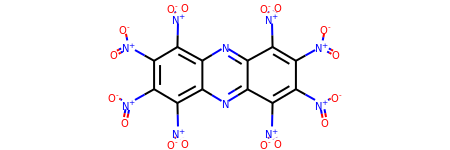

In [15]:
m

In [6]:
from rdkit import Chem

RDKit WARNING: [14:23:26] Enabling RDKit 2019.09.3 jupyter extensions


In [7]:
data=data.dropna(subset=['mol_filename_neutral'])

In [8]:
from rdkit.Chem import Descriptors
for d in Descriptors.descList:
    p=[]
    for row in data.iterrows():
        filename=row[1]['mol_filename_neutral']
        m=Chem.MolFromMolFile(f'molecules/neutral/{filename}.mol')
        p.append(d[1](m))
    data[d[0]]=p

RDKit WARNING: [14:23:26] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:26] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:26] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:26] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:26] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:26] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:26] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:26] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:26] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:26] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:26] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:26] Warning: molecule

RDKit WARNING: [14:23:26] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:26] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:26] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:26] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:26] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:26] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:26] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:26] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:26] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:26] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:26] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:26] Warning: molecule

RDKit WARNING: [14:23:27] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:27] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:27] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:27] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:27] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:27] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:27] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:27] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:27] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:27] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:27] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:27] Warning: molecule

RDKit WARNING: [14:23:28] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:28] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:28] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:28] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:28] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:28] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:28] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:28] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:28] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:28] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:28] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:28] Warning: molecule

RDKit WARNING: [14:23:28] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:28] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:28] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:28] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:28] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:28] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:28] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:28] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:28] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:28] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:28] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:28] Warning: molecule

RDKit WARNING: [14:23:28] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:28] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:28] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:28] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:28] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:28] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:28] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:28] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:28] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:28] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:28] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:28] Warning: molecule

RDKit WARNING: [14:23:29] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:29] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:29] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:29] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:29] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:29] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:29] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:29] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:29] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:29] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:29] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:29] Warning: molecule

RDKit WARNING: [14:23:29] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:29] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:29] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:29] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:29] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:29] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:29] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:29] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:29] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:29] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:29] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:29] Warning: molecule

RDKit WARNING: [14:23:30] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:30] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:30] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:30] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:30] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:30] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:30] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:30] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:30] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:30] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:30] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:30] Warning: molecule

RDKit WARNING: [14:23:30] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:30] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:30] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:30] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:30] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:30] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:30] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:30] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:30] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:30] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:30] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:30] Warning: molecule

RDKit WARNING: [14:23:30] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:30] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:30] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:30] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:30] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:30] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:30] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:30] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:30] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:30] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:30] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:30] Warning: molecule

RDKit WARNING: [14:23:30] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:30] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:30] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:30] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:30] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:30] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:30] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:30] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:30] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:30] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:30] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:30] Warning: molecule

RDKit WARNING: [14:23:31] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:31] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:31] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:31] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:31] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:31] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:31] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:31] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:31] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:31] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:31] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:31] Warning: molecule

RDKit WARNING: [14:23:31] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:31] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:31] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:31] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:31] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:31] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:31] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:31] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:31] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:31] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:31] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:31] Warning: molecule

RDKit WARNING: [14:23:31] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:31] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:31] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:31] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:31] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:31] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:31] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:31] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:31] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:31] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:31] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:31] Warning: molecule

RDKit WARNING: [14:23:31] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:31] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:31] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:31] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:31] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:31] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:31] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:31] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:31] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:31] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:31] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:31] Warning: molecule

RDKit WARNING: [14:23:32] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:32] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:32] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:32] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:32] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:32] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:32] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:32] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:32] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:32] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:32] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:32] Warning: molecule

RDKit WARNING: [14:23:32] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:32] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:32] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:32] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:32] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:32] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:32] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:32] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:32] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:32] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:32] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:32] Warning: molecule

RDKit WARNING: [14:23:32] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:32] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:32] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:32] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:32] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:32] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:32] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:32] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:32] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:32] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:32] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:32] Warning: molecule

RDKit WARNING: [14:23:33] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:33] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:33] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:33] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:33] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:33] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:33] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:33] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:33] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:33] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:33] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:33] Warning: molecule

RDKit WARNING: [14:23:33] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:33] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:33] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:33] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:33] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:33] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:33] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:33] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:33] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:33] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:33] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:33] Warning: molecule

RDKit WARNING: [14:23:33] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:33] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:33] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:33] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:33] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:33] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:33] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:33] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:33] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:33] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:33] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:33] Warning: molecule

RDKit WARNING: [14:23:34] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:34] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:34] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:34] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:34] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:34] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:34] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:34] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:34] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:34] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:34] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:34] Warning: molecule

RDKit WARNING: [14:23:34] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:34] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:34] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:34] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:34] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:34] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:34] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:34] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:34] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:34] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:34] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:34] Warning: molecule

RDKit WARNING: [14:23:34] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:34] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:34] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:34] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:34] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:34] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:34] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:34] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:34] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:34] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:34] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:34] Warning: molecule

RDKit WARNING: [14:23:34] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:34] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:34] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:34] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:34] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:34] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:34] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:34] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:34] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:34] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:34] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:34] Warning: molecule

RDKit WARNING: [14:23:35] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:35] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:35] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:35] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:35] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:35] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:35] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:35] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:35] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:35] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:35] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:35] Warning: molecule

RDKit WARNING: [14:23:35] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:35] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:35] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:35] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:35] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:35] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:35] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:35] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:35] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:35] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:35] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:35] Warning: molecule

RDKit WARNING: [14:23:35] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:35] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:35] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:35] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:35] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:35] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:35] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:35] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:35] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:35] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:35] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:35] Warning: molecule

RDKit WARNING: [14:23:36] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:36] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:36] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:36] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:36] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:36] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:36] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:36] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:36] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:36] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:36] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:36] Warning: molecule

RDKit WARNING: [14:23:36] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:36] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:36] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:36] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:36] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:36] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:36] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:36] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:36] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:36] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:36] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:36] Warning: molecule

RDKit WARNING: [14:23:36] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:36] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:36] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:36] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:36] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:36] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:36] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:36] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:36] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:36] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:36] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:36] Warning: molecule

RDKit WARNING: [14:23:37] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:37] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:37] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:37] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:37] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:37] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:37] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:37] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:37] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:37] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:37] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:37] Warning: molecule

RDKit WARNING: [14:23:37] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:37] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:37] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:37] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:37] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:37] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:37] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:37] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:37] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:37] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:37] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:37] Warning: molecule

RDKit WARNING: [14:23:38] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:38] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:38] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:38] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:38] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:38] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:38] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:38] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:38] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:38] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:38] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:38] Warning: molecule

RDKit WARNING: [14:23:38] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:38] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:38] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:38] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:38] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:38] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:38] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:38] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:38] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:38] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:38] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:38] Warning: molecule

RDKit WARNING: [14:23:39] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:39] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:39] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:39] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:39] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:39] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:39] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:39] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:39] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:39] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:39] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:39] Warning: molecule

RDKit WARNING: [14:23:39] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:39] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:39] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:39] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:39] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:39] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:39] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:39] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:39] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:39] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:39] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:39] Warning: molecule

RDKit WARNING: [14:23:40] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:40] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:40] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:40] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:40] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:40] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:40] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:40] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:40] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:40] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:40] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:40] Warning: molecule

RDKit WARNING: [14:23:40] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:40] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:40] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:40] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:40] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:40] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:40] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:40] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:40] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:40] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:40] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:40] Warning: molecule

RDKit WARNING: [14:23:40] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:40] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:40] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:40] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:40] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:40] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:40] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:40] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:40] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:40] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:40] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:40] Warning: molecule

RDKit WARNING: [14:23:41] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:41] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:41] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:41] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:41] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:41] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:41] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:41] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:41] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:41] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:41] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:41] Warning: molecule

RDKit WARNING: [14:23:41] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:41] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:41] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:41] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:41] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:41] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:41] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:41] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:41] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:41] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:41] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:41] Warning: molecule

RDKit WARNING: [14:23:41] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:41] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:41] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:41] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:41] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:41] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:41] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:41] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:41] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:41] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:41] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:41] Warning: molecule

RDKit WARNING: [14:23:41] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:41] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:41] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:41] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:41] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:41] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:41] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:41] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:41] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:41] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:41] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:41] Warning: molecule

RDKit WARNING: [14:23:42] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:42] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:42] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:42] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:42] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:42] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:42] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:42] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:42] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:42] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:42] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:42] Warning: molecule

RDKit WARNING: [14:23:42] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:42] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:42] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:42] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:42] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:42] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:42] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:42] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:42] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:42] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:42] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:42] Warning: molecule

RDKit WARNING: [14:23:42] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:42] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:42] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:42] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:42] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:42] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:42] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:42] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:42] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:42] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:42] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:42] Warning: molecule

RDKit WARNING: [14:23:43] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:43] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:43] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:43] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:43] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:43] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:43] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:43] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:43] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:43] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:43] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:43] Warning: molecule

RDKit WARNING: [14:23:43] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:43] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:43] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:43] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:43] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:43] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:43] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:43] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:43] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:43] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:43] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:43] Warning: molecule

RDKit WARNING: [14:23:43] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:43] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:43] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:43] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:43] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:43] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:43] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:43] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:43] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:43] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:43] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:43] Warning: molecule

RDKit WARNING: [14:23:43] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:43] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:43] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:43] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:43] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:43] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:43] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:43] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:43] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:43] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:43] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:43] Warning: molecule

RDKit WARNING: [14:23:43] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:43] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:43] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:43] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:43] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:43] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:43] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:43] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:43] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:43] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:43] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:43] Warning: molecule

RDKit WARNING: [14:23:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:44] Warning: molecule

RDKit WARNING: [14:23:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:44] Warning: molecule

RDKit WARNING: [14:23:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:44] Warning: molecule

RDKit WARNING: [14:23:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:44] Warning: molecule

RDKit WARNING: [14:23:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:44] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:44] Warning: molecule

RDKit WARNING: [14:23:45] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:45] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:45] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:45] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:45] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:45] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:45] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:45] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:45] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:45] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:45] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:45] Warning: molecule

RDKit WARNING: [14:23:45] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:45] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:45] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:45] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:45] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:45] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:45] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:45] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:45] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:45] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:45] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:45] Warning: molecule

RDKit WARNING: [14:23:45] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:45] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:45] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:45] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:45] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:45] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:45] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:45] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:45] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:45] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:45] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:45] Warning: molecule

RDKit WARNING: [14:23:45] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:45] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:45] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:45] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:45] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:45] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:45] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:45] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:45] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:45] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:45] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:45] Warning: molecule

RDKit WARNING: [14:23:45] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:45] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:45] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:45] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:45] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:45] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:45] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:45] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:45] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:45] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:45] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:45] Warning: molecule

RDKit WARNING: [14:23:46] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:46] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:46] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:46] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:46] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:46] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:46] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:46] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:46] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:46] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:46] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:46] Warning: molecule

RDKit WARNING: [14:23:46] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:46] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:46] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:46] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:46] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:46] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:46] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:46] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:46] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:46] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:46] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:46] Warning: molecule

RDKit WARNING: [14:23:46] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:46] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:46] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:46] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:46] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:46] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:46] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:46] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:46] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:46] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:46] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:46] Warning: molecule

RDKit WARNING: [14:23:46] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:46] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:46] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:46] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:46] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:46] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:46] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:46] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:46] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:46] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:46] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:46] Warning: molecule

RDKit WARNING: [14:23:47] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:47] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:47] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:47] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:47] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:47] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:47] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:47] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:47] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:47] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:47] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:47] Warning: molecule

RDKit WARNING: [14:23:47] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:47] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:47] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:47] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:47] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:47] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:47] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:47] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:47] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:47] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:47] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:47] Warning: molecule

RDKit WARNING: [14:23:47] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:47] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:47] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:47] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:47] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:47] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:47] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:47] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:47] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:47] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:47] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:47] Warning: molecule

RDKit WARNING: [14:23:47] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:47] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:47] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:47] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:47] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:47] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:47] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:47] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:47] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:47] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:47] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:47] Warning: molecule

RDKit WARNING: [14:23:47] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:47] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:47] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:47] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:47] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:47] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:47] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:47] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:47] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:47] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:47] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:47] Warning: molecule

RDKit WARNING: [14:23:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:48] Warning: molecule

RDKit WARNING: [14:23:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:48] Warning: molecule

RDKit WARNING: [14:23:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:48] Warning: molecule

RDKit WARNING: [14:23:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:48] Warning: molecule

RDKit WARNING: [14:23:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:48] Warning: molecule

RDKit WARNING: [14:23:49] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:49] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:49] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:49] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:49] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:49] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:49] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:49] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:49] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:49] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:49] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:49] Warning: molecule

RDKit WARNING: [14:23:49] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:49] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:49] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:49] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:49] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:49] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:49] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:49] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:49] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:49] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:49] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:49] Warning: molecule

RDKit WARNING: [14:23:49] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:49] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:49] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:49] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:49] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:49] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:49] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:49] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:49] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:49] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:49] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:49] Warning: molecule

RDKit WARNING: [14:23:49] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:49] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:49] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:49] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:49] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:49] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:49] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:49] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:49] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:49] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:49] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:49] Warning: molecule

RDKit WARNING: [14:23:49] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:49] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:49] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:49] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:49] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:49] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:49] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:49] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:49] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:49] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:49] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:49] Warning: molecule

RDKit WARNING: [14:23:50] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:50] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:50] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:50] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:50] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:50] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:50] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:50] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:50] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:50] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:50] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:50] Warning: molecule

RDKit WARNING: [14:23:50] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:50] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:50] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:50] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:50] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:50] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:50] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:50] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:50] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:50] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:50] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:50] Warning: molecule

RDKit WARNING: [14:23:50] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:50] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:50] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:50] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:50] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:50] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:50] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:50] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:50] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:50] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:50] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:50] Warning: molecule

RDKit WARNING: [14:23:50] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:50] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:50] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:50] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:50] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:50] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:50] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:50] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:50] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:50] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:50] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:50] Warning: molecule

RDKit WARNING: [14:23:50] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:50] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:50] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:50] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:50] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:50] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:50] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:50] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:50] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:50] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:50] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:50] Warning: molecule

RDKit WARNING: [14:23:51] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:51] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:51] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:51] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:51] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:51] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:51] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:51] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:51] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:51] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:51] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:51] Warning: molecule

RDKit WARNING: [14:23:51] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:51] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:51] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:51] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:51] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:51] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:51] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:51] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:51] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:51] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:51] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:23:51] Warning: molecule

In [9]:
data

,Sr. No.,FG,FG Position,Redox Potential,mol_filename_neutral,mol_filename_anion,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,Phenazine,-,-,-1.74,PHENAZINE_neutral,PHENAZINE_anion,4.515185,0.950185,4.515185,0.950185,...,0,0,0,0,0,0,0,0,0,0
1,1,2CH3N,1,-1.85,2CH3N_R1_neutral,2CH3N_R1_Anion,4.694722,0.939167,4.694722,0.939167,...,0,0,0,0,0,0,0,0,0,0
2,2,2CH3N,2,-1.98,2CH3N_R2_neutral,2CH3N_R2_Anion,4.631574,0.939167,4.631574,0.939167,...,0,0,0,0,0,0,0,0,0,0
3,3,NH2,1,-1.85,NH2_R1_neutral,NH2_R1_anion,5.844735,0.671994,5.844735,0.671994,...,0,0,0,0,0,0,0,0,0,0
4,4,NH2,2,-1.92,NH2_R2_neutral,NH2_R2_anion,5.700164,0.714890,5.700164,0.714890,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,185,NO2,1 2 6 7,-0.35,NO2_R1267_neutral,NO2_R1267_anion,11.230655,-1.013112,11.230655,0.251483,...,0,0,0,0,0,0,0,0,0,0
185,186,NO2,1 4 6 9,-0.52,NO2_R1469_neutral,NO2_R1469_anion,11.151935,-0.893097,11.151935,0.583057,...,0,0,0,0,0,0,0,0,0,0
186,187,NO2,2 3 7 8,-0.52,NO2_R2378_neutral,NO2_R2378_anion,10.985181,-0.970500,10.985181,0.126897,...,0,0,0,0,0,0,0,0,0,0
187,188,NO2,1 2 3 4 6 9,0.16,NO2_R123469_neutral,NO2_R123469_anion,11.524990,-1.915802,11.524990,0.598243,...,0,0,0,0,0,0,0,0,0,0


In [10]:
data=data.loc[:, (data != data.iloc[0]).any()] 
data

,Sr. No.,FG,FG Position,Redox Potential,mol_filename_neutral,mol_filename_anion,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,...,fr_methoxy,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_priamide,fr_sulfide
0,Phenazine,-,-,-1.74,PHENAZINE_neutral,PHENAZINE_anion,4.515185,0.950185,4.515185,0.950185,...,0,0,0,0,0,4,0,0,0,0
1,1,2CH3N,1,-1.85,2CH3N_R1_neutral,2CH3N_R1_Anion,4.694722,0.939167,4.694722,0.939167,...,0,0,0,0,0,3,0,0,0,0
2,2,2CH3N,2,-1.98,2CH3N_R2_neutral,2CH3N_R2_Anion,4.631574,0.939167,4.631574,0.939167,...,0,0,0,0,0,2,0,0,0,0
3,3,NH2,1,-1.85,NH2_R1_neutral,NH2_R1_anion,5.844735,0.671994,5.844735,0.671994,...,0,0,0,0,0,3,0,0,0,0
4,4,NH2,2,-1.92,NH2_R2_neutral,NH2_R2_anion,5.700164,0.714890,5.700164,0.714890,...,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,185,NO2,1 2 6 7,-0.35,NO2_R1267_neutral,NO2_R1267_anion,11.230655,-1.013112,11.230655,0.251483,...,0,0,4,4,0,0,0,0,0,0
185,186,NO2,1 4 6 9,-0.52,NO2_R1469_neutral,NO2_R1469_anion,11.151935,-0.893097,11.151935,0.583057,...,0,0,4,4,4,0,0,0,0,0
186,187,NO2,2 3 7 8,-0.52,NO2_R2378_neutral,NO2_R2378_anion,10.985181,-0.970500,10.985181,0.126897,...,0,0,4,4,0,0,0,0,0,0
187,188,NO2,1 2 3 4 6 9,0.16,NO2_R123469_neutral,NO2_R123469_anion,11.524990,-1.915802,11.524990,0.598243,...,0,0,6,6,2,0,0,0,0,0


In [11]:
data.dtypes

Sr. No.                    object
FG                         object
FG Position                object
Redox Potential           float64
mol_filename_neutral       object
                           ...   
fr_para_hydroxylation       int64
fr_phenol                   int64
fr_phenol_noOrthoHbond      int64
fr_priamide                 int64
fr_sulfide                  int64
Length: 140, dtype: object

In [12]:
data.to_csv('DATA.csv',index=False)

In [13]:
# from io import StringIO

# pd.read_csv(StringIO(mol_dict['PHENAZINE neutral']),names=['element','x','y','z'],sep='\t')

# for _,value in mol_dict.items():
#     df=pd.read_csv(StringIO(value),names=['element','x','y','z'])
# df